In [4]:
import tensorflow as tf
print("TensorFlow Version:", tf.__version__)
print("GPU Available:", tf.test.gpu_device_name())

TensorFlow Version: 2.20.0
GPU Available: 


In [8]:
# ========================================
# CELL 1: Import Required Libraries
# ========================================

import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    classification_report, confusion_matrix, 
    accuracy_score, precision_score, recall_score, f1_score
)
from sklearn.utils import shuffle
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import (
    Dense, GlobalAveragePooling2D, Dropout, 
    BatchNormalization
)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import (
    ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
)
from PIL import Image
import warnings
warnings.filterwarnings('ignore')

print("="*70)
print("           DEEPFAKE DETECTION PROJECT - INITIALIZATION")
print("="*70)
print(f"\n✅ TensorFlow Version: {tf.__version__}")
print(f"✅ OpenCV Version: {cv2.__version__}")
print(f"✅ NumPy Version: {np.__version__}")
print(f"✅ Pandas Version: {pd.__version__}")
print("\n✅ All libraries imported successfully!")

ModuleNotFoundError: No module named 'cv2'

In [9]:
pip install cv2


Note: you may need to restart the kernel to use updated packages.


ERROR: Could not find a version that satisfies the requirement cv2 (from versions: none)

[notice] A new release of pip is available: 25.2 -> 26.0.1
[notice] To update, run: C:\Users\hp\AppData\Local\Programs\Python\Python313\python.exe -m pip install --upgrade pip
ERROR: No matching distribution found for cv2


In [10]:
# ========================================
# CELL 1: Import Required Libraries
# ========================================

import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    classification_report, confusion_matrix, 
    accuracy_score, precision_score, recall_score, f1_score
)
from sklearn.utils import shuffle
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import (
    Dense, GlobalAveragePooling2D, Dropout, 
    BatchNormalization
)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import (
    ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
)
from PIL import Image
import warnings
warnings.filterwarnings('ignore')

print("="*70)
print("           DEEPFAKE DETECTION PROJECT - INITIALIZATION")
print("="*70)
print(f"\n✅ TensorFlow Version: {tf.__version__}")
print(f"✅ OpenCV Version: {cv2.__version__}")
print(f"✅ NumPy Version: {np.__version__}")
print(f"✅ Pandas Version: {pd.__version__}")
print("\n✅ All libraries imported successfully!")

ModuleNotFoundError: No module named 'cv2'

In [11]:
pip install opencv-python

   ---------------------------------------- 0.0/40.2 MB ? eta -:--:--
   - -------------------------------------- 1.3/40.2 MB 7.0 MB/s eta 0:00:06
   -- ------------------------------------- 2.9/40.2 MB 7.3 MB/s eta 0:00:06
   ---- ----------------------------------- 4.7/40.2 MB 7.8 MB/s eta 0:00:05
   ----- ---------------------------------- 6.0/40.2 MB 7.7 MB/s eta 0:00:05
   ------- -------------------------------- 7.6/40.2 MB 7.5 MB/s eta 0:00:05
   -------- ------------------------------- 8.9/40.2 MB 7.4 MB/s eta 0:00:05
   ---------- ----------------------------- 10.5/40.2 MB 7.3 MB/s eta 0:00:05
   ----------- ---------------------------- 11.8/40.2 MB 7.1 MB/s eta 0:00:04
   ------------- -------------------------- 13.1/40.2 MB 7.0 MB/s eta 0:00:04
   -------------- ------------------------- 14.4/40.2 MB 7.0 MB/s eta 0:00:04
   --------------- ------------------------ 15.7/40.2 MB 6.9 MB/s eta 0:00:04
   ---------------- ----------------------- 16.8/40.2 MB 6.8 MB/s eta 0:00:04



[notice] A new release of pip is available: 25.2 -> 26.0.1
[notice] To update, run: C:\Users\hp\AppData\Local\Programs\Python\Python313\python.exe -m pip install --upgrade pip


SyntaxError: invalid syntax (842801469.py, line 1)

In [13]:
# ========================================
# CELL 1: Import Required Libraries
# ========================================

import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    classification_report, confusion_matrix, 
    accuracy_score, precision_score, recall_score, f1_score
)
from sklearn.utils import shuffle
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import (
    Dense, GlobalAveragePooling2D, Dropout, 
    BatchNormalization
)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import (
    ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
)
from PIL import Image
import warnings
warnings.filterwarnings('ignore')

print("="*70)
print("           DEEPFAKE DETECTION PROJECT - INITIALIZATION")
print("="*70)
print(f"\n✅ TensorFlow Version: {tf.__version__}")
print(f"✅ OpenCV Version: {cv2.__version__}")
print(f"✅ NumPy Version: {np.__version__}")
print(f"✅ Pandas Version: {pd.__version__}")
print("\n✅ All libraries imported successfully!")

           DEEPFAKE DETECTION PROJECT - INITIALIZATION

✅ TensorFlow Version: 2.20.0
✅ OpenCV Version: 4.13.0
✅ NumPy Version: 2.3.3
✅ Pandas Version: 2.3.3

✅ All libraries imported successfully!


In [14]:
# ========================================
# CELL 2: Global Configuration Parameters
# ========================================

# Image parameters
IMG_SIZE = 224  # Standard size for MobileNetV2
BATCH_SIZE = 32
EPOCHS = 20
LEARNING_RATE = 0.001

# Dataset paths - UPDATED FOR YOUR DATASET STRUCTURE
DATASET_ROOT = './Dataset'
TRAIN_DIR = os.path.join(DATASET_ROOT, 'Train')
TEST_DIR = os.path.join(DATASET_ROOT, 'Test')
VAL_DIR = os.path.join(DATASET_ROOT, 'Validation')

# Class folders
TRAIN_FAKE = os.path.join(TRAIN_DIR, 'Fake')
TRAIN_REAL = os.path.join(TRAIN_DIR, 'Real')
TEST_FAKE = os.path.join(TEST_DIR, 'Fake')
TEST_REAL = os.path.join(TEST_DIR, 'Real')
VAL_FAKE = os.path.join(VAL_DIR, 'Fake')
VAL_REAL = os.path.join(VAL_DIR, 'Real')

print("="*70)
print("              CONFIGURATION PARAMETERS")
print("="*70)
print(f"\n📊 Model Configuration:")
print(f"   Image Size: {IMG_SIZE}x{IMG_SIZE}")
print(f"   Batch Size: {BATCH_SIZE}")
print(f"   Epochs: {EPOCHS}")
print(f"   Learning Rate: {LEARNING_RATE}")

print(f"\n📁 Dataset Paths:")
print(f"   Root: {DATASET_ROOT}")
print(f"   Train: {TRAIN_DIR}")
print(f"   Test: {TEST_DIR}")
print(f"   Validation: {VAL_DIR}")

              CONFIGURATION PARAMETERS

📊 Model Configuration:
   Image Size: 224x224
   Batch Size: 32
   Epochs: 20
   Learning Rate: 0.001

📁 Dataset Paths:
   Root: ./Dataset
   Train: ./Dataset\Train
   Test: ./Dataset\Test
   Validation: ./Dataset\Validation


In [15]:
# ========================================
# CELL 1: Import Required Libraries
# ========================================

import os
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import (
    classification_report, confusion_matrix, 
    accuracy_score, precision_score, recall_score, f1_score
)
from sklearn.utils import shuffle
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.models import Model, Sequential
from tensorflow.keras.layers import (
    Dense, GlobalAveragePooling2D, Dropout, 
    BatchNormalization
)
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import (
    ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
)
from PIL import Image
import warnings
warnings.filterwarnings('ignore')

print("="*70)
print("           DEEPFAKE DETECTION PROJECT - INITIALIZATION")
print("="*70)
print(f"\n✅ TensorFlow Version: {tf.__version__}")
print(f"✅ OpenCV Version: {cv2.__version__}")
print(f"✅ NumPy Version: {np.__version__}")
print(f"✅ Pandas Version: {pd.__version__}")
print("\n✅ All libraries imported successfully!")

           DEEPFAKE DETECTION PROJECT - INITIALIZATION

✅ TensorFlow Version: 2.20.0
✅ OpenCV Version: 4.13.0
✅ NumPy Version: 2.3.3
✅ Pandas Version: 2.3.3

✅ All libraries imported successfully!


In [16]:
# ========================================
# CELL 2: Global Configuration Parameters
# ========================================

# Image parameters
IMG_SIZE = 224  # Standard size for MobileNetV2
BATCH_SIZE = 32
EPOCHS = 20
LEARNING_RATE = 0.001

# Dataset paths - UPDATED FOR YOUR DATASET STRUCTURE
DATASET_ROOT = './Dataset'
TRAIN_DIR = os.path.join(DATASET_ROOT, 'Train')
TEST_DIR = os.path.join(DATASET_ROOT, 'Test')
VAL_DIR = os.path.join(DATASET_ROOT, 'Validation')

# Class folders
TRAIN_FAKE = os.path.join(TRAIN_DIR, 'Fake')
TRAIN_REAL = os.path.join(TRAIN_DIR, 'Real')
TEST_FAKE = os.path.join(TEST_DIR, 'Fake')
TEST_REAL = os.path.join(TEST_DIR, 'Real')
VAL_FAKE = os.path.join(VAL_DIR, 'Fake')
VAL_REAL = os.path.join(VAL_DIR, 'Real')

print("="*70)
print("              CONFIGURATION PARAMETERS")
print("="*70)
print(f"\n📊 Model Configuration:")
print(f"   Image Size: {IMG_SIZE}x{IMG_SIZE}")
print(f"   Batch Size: {BATCH_SIZE}")
print(f"   Epochs: {EPOCHS}")
print(f"   Learning Rate: {LEARNING_RATE}")

print(f"\n📁 Dataset Paths:")
print(f"   Root: {DATASET_ROOT}")
print(f"   Train: {TRAIN_DIR}")
print(f"   Test: {TEST_DIR}")
print(f"   Validation: {VAL_DIR}")

              CONFIGURATION PARAMETERS

📊 Model Configuration:
   Image Size: 224x224
   Batch Size: 32
   Epochs: 20
   Learning Rate: 0.001

📁 Dataset Paths:
   Root: ./Dataset
   Train: ./Dataset\Train
   Test: ./Dataset\Test
   Validation: ./Dataset\Validation


In [18]:
# ========================================
# CELL 3: Comprehensive Dataset Verification
# ========================================

def verify_dataset_structure():
    """
    Verify that dataset is properly uploaded and structured
    """
    print("="*70)
    print("              DATASET STRUCTURE VERIFICATION")
    print("="*70)
    
    all_good = True
    
    # Check root dataset folder
    if not os.path.exists(DATASET_ROOT):
        print(f"\n❌ ERROR: 'Dataset' folder not found!")
        print(f"   Expected location: {os.path.abspath(DATASET_ROOT)}")
        print(f"\n📝 Solution:")
        print(f"   1. Download dataset from: https://www.kaggle.com/datasets/manjilkarki/deepfake-and-real-images")
        print(f"   2. Extract the ZIP file")
        print(f"   3. Copy the 'Dataset' folder to your project directory")
        return False
    
    # Check all required folders
    required_folders = {
        'Train/Fake': TRAIN_FAKE,
        'Train/Real': TRAIN_REAL,
        'Test/Fake': TEST_FAKE,
        'Test/Real': TEST_REAL,
        'Validation/Fake': VAL_FAKE,
        'Validation/Real': VAL_REAL
    }
    
    print(f"\n🔍 Checking folder structure...\n")
    
    folder_stats = {}
    
    for folder_name, folder_path in required_folders.items():
        if os.path.exists(folder_path):
            # Count images
            images = [f for f in os.listdir(folder_path) 
                     if f.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp'))]
            count = len(images)
            folder_stats[folder_name] = count
            
            status = "✅" if count > 0 else "⚠️"
            print(f"   {status} {folder_name:20s}: {count:,} images")
            
            if count == 0:
                print(f"      └─ WARNING: Folder exists but is empty!")
                all_good = False
        else:
            print(f"   ❌ {folder_name:20s}: FOLDER NOT FOUND")
            folder_stats[folder_name] = 0
            all_good = False
    
    if not all_good:
        print(f"\n❌ Dataset verification FAILED!")
        print(f"\n📝 Please ensure:")
        print(f"   1. Dataset is downloaded from Kaggle")
        print(f"   2. ZIP file is extracted completely")
        print(f"   3. 'Dataset' folder is in project root")
        print(f"   4. All subfolders (Train/Test/Validation) exist")
        return False
    
    # Calculate totals
    train_total = folder_stats['Train/Fake'] + folder_stats['Train/Real']
    test_total = folder_stats['Test/Fake'] + folder_stats['Test/Real']
    val_total = folder_stats['Validation/Fake'] + folder_stats['Validation/Real']
    grand_total = train_total + test_total + val_total
    
    print(f"\n" + "="*70)
    print(f"✅ DATASET VERIFICATION PASSED!")
    print(f"="*70)
    print(f"\n📊 Dataset Statistics:")
    print(f"   Training Set:   {train_total:,} images ({train_total/grand_total*100:.1f}%)")
    print(f"      ├─ Real:     {folder_stats['Train/Real']:,}")
    print(f"      └─ Fake:     {folder_stats['Train/Fake']:,}")
    print(f"\n   Validation Set: {val_total:,} images ({val_total/grand_total*100:.1f}%)")
    print(f"      ├─ Real:     {folder_stats['Validation/Real']:,}")
    print(f"      └─ Fake:     {folder_stats['Validation/Fake']:,}")
    print(f"\n   Test Set:       {test_total:,} images ({test_total/grand_total*100:.1f}%)")
    print(f"      ├─ Real:     {folder_stats['Test/Real']:,}")
    print(f"      └─ Fake:     {folder_stats['Test/Fake']:,}")
    print(f"\n   GRAND TOTAL:    {grand_total:,} images")
    
    # Check class balance
    train_balance = folder_stats['Train/Real'] / folder_stats['Train/Fake'] if folder_stats['Train/Fake'] > 0 else 0
    print(f"\n⚖️ Class Balance (Train):")
    if 0.8 <= train_balance <= 1.2:
        print(f"   ✅ Well balanced (ratio: {train_balance:.2f})")
    else:
        print(f"   ⚠️ Imbalanced (ratio: {train_balance:.2f})")
    
    return True, folder_stats

# Run verification
dataset_available, dataset_stats = verify_dataset_structure()

if not dataset_available:
    print("\n" + "="*70)
    print("⚠️  PLEASE FIX THE DATASET ISSUES BEFORE PROCEEDING")
    print("="*70)

              DATASET STRUCTURE VERIFICATION

🔍 Checking folder structure...

   ✅ Train/Fake          : 9,859 images
   ✅ Train/Real          : 3,058 images
   ✅ Test/Fake           : 4,952 images
   ✅ Test/Real           : 3,338 images
   ✅ Validation/Fake     : 4,274 images
   ✅ Validation/Real     : 2,646 images

✅ DATASET VERIFICATION PASSED!

📊 Dataset Statistics:
   Training Set:   12,917 images (45.9%)
      ├─ Real:     3,058
      └─ Fake:     9,859

   Validation Set: 6,920 images (24.6%)
      ├─ Real:     2,646
      └─ Fake:     4,274

   Test Set:       8,290 images (29.5%)
      ├─ Real:     3,338
      └─ Fake:     4,952

   GRAND TOTAL:    28,127 images

⚖️ Class Balance (Train):
   ⚠️ Imbalanced (ratio: 0.31)



🖼️ Displaying sample images from dataset...



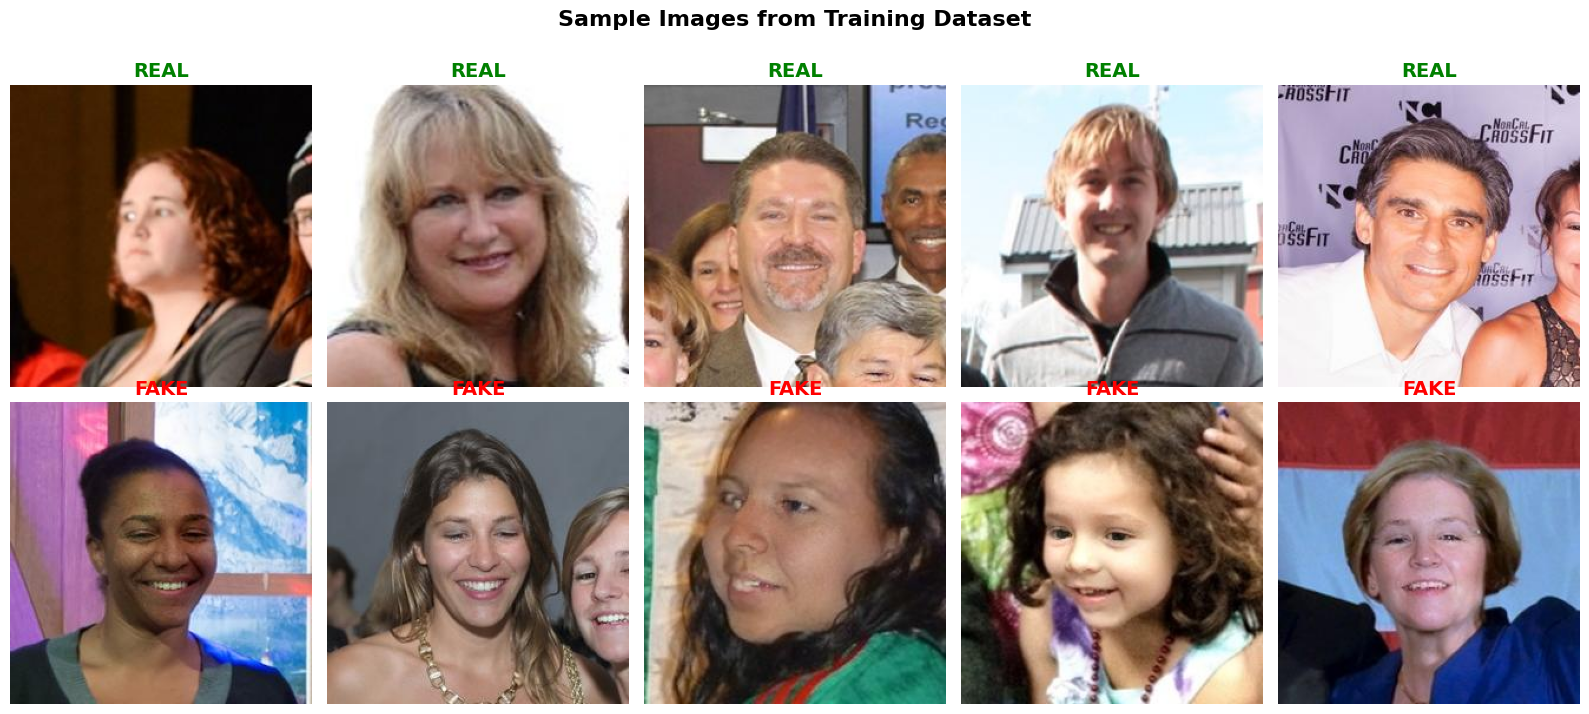

In [19]:
# ========================================
# CELL 4: Visualize Sample Images from Dataset
# ========================================

def display_sample_images_from_dataset(num_samples=5):
    """
    Display sample images from Train/Real and Train/Fake folders
    """
    if not dataset_available:
        print("❌ Dataset not available. Please upload dataset first.")
        return
    
    fig, axes = plt.subplots(2, num_samples, figsize=(16, 7))
    
    # Get random real images from training set
    real_images = [f for f in os.listdir(TRAIN_REAL) 
                   if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
    fake_images = [f for f in os.listdir(TRAIN_FAKE) 
                   if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
    
    real_samples = np.random.choice(real_images, num_samples, replace=False)
    fake_samples = np.random.choice(fake_images, num_samples, replace=False)
    
    # Display real images
    for i, img_name in enumerate(real_samples):
        img_path = os.path.join(TRAIN_REAL, img_name)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            axes[0, i].imshow(img)
            axes[0, i].set_title('REAL', color='green', fontweight='bold', fontsize=14)
            axes[0, i].axis('off')
    
    # Display fake images
    for i, img_name in enumerate(fake_samples):
        img_path = os.path.join(TRAIN_FAKE, img_name)
        img = cv2.imread(img_path)
        if img is not None:
            img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            axes[1, i].imshow(img)
            axes[1, i].set_title('FAKE', color='red', fontweight='bold', fontsize=14)
            axes[1, i].axis('off')
    
    plt.suptitle('Sample Images from Training Dataset', 
                 fontsize=16, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.show()

if dataset_available:
    print("\n🖼️ Displaying sample images from dataset...\n")
    display_sample_images_from_dataset(num_samples=5)

In [20]:
# ========================================
# CELL 5: Data Augmentation & Generators Setup
# ========================================

if dataset_available:
    
    print("="*70)
    print("           SETTING UP DATA GENERATORS")
    print("="*70)
    
    # Training data generator with augmentation
    train_datagen = ImageDataGenerator(
        rescale=1./255,              # Normalize to [0,1]
        rotation_range=20,           # Random rotation ±20°
        width_shift_range=0.2,       # Horizontal shift
        height_shift_range=0.2,      # Vertical shift
        horizontal_flip=True,        # Random horizontal flip
        zoom_range=0.2,              # Random zoom
        shear_range=0.2,             # Shear transformation
        fill_mode='nearest'          # Fill strategy
    )
    
    # Validation and Test generators (no augmentation, only rescaling)
    val_test_datagen = ImageDataGenerator(rescale=1./255)
    
    print("\n🎨 Data Augmentation Configuration:")
    print("   ✓ Rescaling: Pixels normalized to [0, 1]")
    print("   ✓ Rotation: ±20 degrees")
    print("   ✓ Width/Height Shift: 20%")
    print("   ✓ Horizontal Flip: Enabled")
    print("   ✓ Zoom: 20%")
    print("   ✓ Shear: 20%")
    
    # Create generators from directory
    print("\n📂 Creating data generators from directories...")
    
    train_generator = train_datagen.flow_from_directory(
        TRAIN_DIR,
        target_size=(IMG_SIZE, IMG_SIZE),
        batch_size=BATCH_SIZE,
        class_mode='binary',  # Binary classification (Real=0, Fake=1)
        shuffle=True,
        seed=42
    )
    
    validation_generator = val_test_datagen.flow_from_directory(
        VAL_DIR,
        target_size=(IMG_SIZE, IMG_SIZE),
        batch_size=BATCH_SIZE,
        class_mode='binary',
        shuffle=False
    )
    
    test_generator = val_test_datagen.flow_from_directory(
        TEST_DIR,
        target_size=(IMG_SIZE, IMG_SIZE),
        batch_size=BATCH_SIZE,
        class_mode='binary',
        shuffle=False
    )
    
    print("\n✅ Data generators created successfully!")
    print(f"\n📊 Generator Summary:")
    print(f"   Training samples:   {train_generator.samples:,}")
    print(f"   Validation samples: {validation_generator.samples:,}")
    print(f"   Test samples:       {test_generator.samples:,}")
    print(f"\n🏷️ Class Indices:")
    print(f"   {train_generator.class_indices}")
    print(f"   (Fake=0 or 1, Real=1 or 0 - check above)")
    
else:
    print("⚠️ Skipping data generator setup - dataset not available")

           SETTING UP DATA GENERATORS

🎨 Data Augmentation Configuration:
   ✓ Rescaling: Pixels normalized to [0, 1]
   ✓ Rotation: ±20 degrees
   ✓ Width/Height Shift: 20%
   ✓ Horizontal Flip: Enabled
   ✓ Zoom: 20%
   ✓ Shear: 20%

📂 Creating data generators from directories...
Found 12917 images belonging to 3 classes.
Found 6920 images belonging to 3 classes.
Found 8290 images belonging to 3 classes.

✅ Data generators created successfully!

📊 Generator Summary:
   Training samples:   12,917
   Validation samples: 6,920
   Test samples:       8,290

🏷️ Class Indices:
   {'.ipynb_checkpoints': 0, 'Fake': 1, 'Real': 2}
   (Fake=0 or 1, Real=1 or 0 - check above)


In [21]:
# ========================================
# CELL 6: Visualize Data Augmentation
# ========================================

if dataset_available and 'train_generator' in locals():
    
    def visualize_augmentation_from_generator(generator, num_samples=5):
        """
        Visualize augmented images from the generator
        """
        # Get a batch of images
        images, labels = next(generator)
        
        # Select first few images
        sample_images = images[:num_samples]
        sample_labels = labels[:num_samples]
        
        fig, axes = plt.subplots(1, num_samples, figsize=(16, 4))
        
        for i in range(num_samples):
            axes[i].imshow(sample_images[i])
            label = 'FAKE' if sample_labels[i] == 1 else 'REAL'
            color = 'red' if sample_labels[i] == 1 else 'green'
            axes[i].set_title(f'{label}\n(Augmented)', 
                            color=color, fontweight='bold', fontsize=12)
            axes[i].axis('off')
        
        plt.suptitle('Sample Augmented Images from Training Generator', 
                    fontsize=14, fontweight='bold')
        plt.tight_layout()
        plt.show()
    
    print("\n🖼️ Visualizing augmented training images...\n")
    visualize_augmentation_from_generator(train_generator, num_samples=5)
    
    # Reset generator after visualization
    train_generator.reset()

else:
    print("⚠️ Cannot visualize augmentation - generator not available")


🖼️ Visualizing augmented training images...



In [22]:
# ========================================
# CELL 7: Build MobileNetV2 Model
# ========================================

if dataset_available:
    
    print("="*70)
    print("           BUILDING DEEPFAKE DETECTION MODEL")
    print("="*70)
    
    def build_deepfake_detector(img_size=224):
        """
        Build Deepfake Detection Model using MobileNetV2 Transfer Learning
        """
        print("\n🏗️ Constructing model architecture...")
        
        # Load pre-trained MobileNetV2
        base_model = MobileNetV2(
            input_shape=(img_size, img_size, 3),
            include_top=False,
            weights='imagenet'
        )
        
        print("   ✓ Loaded MobileNetV2 (ImageNet weights)")
        
        # Freeze base model
        base_model.trainable = False
        print("   ✓ Froze base model layers")
        
        # Build custom head
        model = Sequential([
            base_model,
            GlobalAveragePooling2D(),
            BatchNormalization(),
            
            Dense(256, activation='relu', name='fc1'),
            Dropout(0.5, name='dropout1'),
            
            Dense(128, activation='relu', name='fc2'),
            Dropout(0.3, name='dropout2'),
            
            Dense(1, activation='sigmoid', name='output')
        ], name='Deepfake_Detector')
        
        print("   ✓ Added custom classification head")
        
        return model
    
    # Build model
    model = build_deepfake_detector(IMG_SIZE)
    
    print("\n" + "="*70)
    print("MODEL ARCHITECTURE SUMMARY")
    print("="*70)
    model.summary()
    
    # Parameter count
    total_params = model.count_params()
    trainable_params = sum([tf.size(w).numpy() for w in model.trainable_weights])
    non_trainable_params = total_params - trainable_params
    
    print("\n📊 Parameter Statistics:")
    print(f"   Total:        {total_params:,}")
    print(f"   Trainable:    {trainable_params:,}")
    print(f"   Non-trainable: {non_trainable_params:,}")
    
else:
    print("⚠️ Cannot build model - dataset not verified")

           BUILDING DEEPFAKE DETECTION MODEL

🏗️ Constructing model architecture...
9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
   ✓ Loaded MobileNetV2 (ImageNet weights)
   ✓ Froze base model layers
   ✓ Added custom classification head

MODEL ARCHITECTURE SUMMARY


Model: "Deepfake_Detector"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ mobilenetv2_1.00_224 (Functional)    │ (None, 7, 7, 1280)          │       2,257,984 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ global_average_pooling2d             │ (None, 1280)                │               0 │
│ (GlobalAveragePooling2D)             │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 1280)                │           5,120 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc1 (Dense)                          │ (None, 256)                 │         327,936 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout1 (Dropout)                   │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ fc2 (Dense)                          │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout2 (Dropout)                   │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ output (Dense)                       │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,624,065 (10.01 MB)

 Trainable params: 363,521 (1.39 MB)

 Non-trainable params: 2,260,544 (8.62 MB)


📊 Parameter Statistics:
   Total:        2,624,065
   Trainable:    363,521
   Non-trainable: 2,260,544


In [23]:
# ========================================
# CELL 8: Compile Model
# ========================================

if 'model' in locals():
    
    print("="*70)
    print("                COMPILING MODEL")
    print("="*70)
    
    # Optimizer
    optimizer = Adam(learning_rate=LEARNING_RATE)
    
    # Compile
    model.compile(
        optimizer=optimizer,
        loss='binary_crossentropy',
        metrics=[
            'accuracy',
            tf.keras.metrics.Precision(name='precision'),
            tf.keras.metrics.Recall(name='recall')
        ]
    )
    
    print("\n✅ Model compiled successfully!")
    print(f"\n🔧 Compilation Configuration:")
    print(f"   Optimizer:      Adam")
    print(f"   Learning Rate:  {LEARNING_RATE}")
    print(f"   Loss Function:  Binary Crossentropy")
    print(f"   Metrics:        Accuracy, Precision, Recall")

else:
    print("⚠️ Model not available for compilation")

                COMPILING MODEL

✅ Model compiled successfully!

🔧 Compilation Configuration:
   Optimizer:      Adam
   Learning Rate:  0.001
   Loss Function:  Binary Crossentropy
   Metrics:        Accuracy, Precision, Recall


In [24]:
# ========================================
# CELL 9: Configure Training Callbacks
# ========================================

if 'model' in locals():
    
    print("="*70)
    print("           CONFIGURING TRAINING CALLBACKS")
    print("="*70)
    
    # Create models directory
    os.makedirs('./models', exist_ok=True)
    
    # ModelCheckpoint
    checkpoint = ModelCheckpoint(
        filepath='./models/best_deepfake_detector.h5',
        monitor='val_accuracy',
        save_best_only=True,
        mode='max',
        verbose=1
    )
    print("\n✓ ModelCheckpoint: Saves best model based on validation accuracy")
    
    # EarlyStopping
    early_stop = EarlyStopping(
        monitor='val_loss',
        patience=5,
        restore_best_weights=True,
        verbose=1
    )
    print("✓ EarlyStopping: Stops training after 5 epochs without improvement")
    
    # ReduceLROnPlateau
    reduce_lr = ReduceLROnPlateau(
        monitor='val_loss',
        factor=0.5,
        patience=3,
        min_lr=1e-7,
        verbose=1
    )
    print("✓ ReduceLROnPlateau: Reduces learning rate when validation loss plateaus")
    
    callbacks_list = [checkpoint, early_stop, reduce_lr]
    
    print("\n✅ All callbacks configured!")

else:
    print("⚠️ Model not available for callback setup")

           CONFIGURING TRAINING CALLBACKS

✓ ModelCheckpoint: Saves best model based on validation accuracy
✓ EarlyStopping: Stops training after 5 epochs without improvement
✓ ReduceLROnPlateau: Reduces learning rate when validation loss plateaus

✅ All callbacks configured!


In [25]:
# ========================================
# CELL 10: Train the Model
# ========================================

if 'model' in locals() and 'train_generator' in locals():
    
    print("\n" + "="*70)
    print("                STARTING MODEL TRAINING")
    print("="*70)
    print("\n🚀 Training will begin now...")
    print("⏳ Estimated time: 30-60 minutes (depends on dataset size)")
    print(f"📊 Training on {train_generator.samples:,} images")
    print(f"📊 Validating on {validation_generator.samples:,} images")
    print("\n" + "="*70 + "\n")
    
    # Calculate steps
    steps_per_epoch = train_generator.samples // BATCH_SIZE
    validation_steps = validation_generator.samples // BATCH_SIZE
    
    # Train model
    history = model.fit(
        train_generator,
        steps_per_epoch=steps_per_epoch,
        epochs=EPOCHS,
        validation_data=validation_generator,
        validation_steps=validation_steps,
        callbacks=callbacks_list,
        verbose=1
    )
    
    print("\n" + "="*70)
    print("✅ MODEL TRAINING COMPLETED!")
    print("="*70)
    
    # Final metrics
    final_epoch = len(history.history['accuracy'])
    print(f"\n📊 Final Training Results (Epoch {final_epoch}):")
    print(f"   Training Accuracy:    {history.history['accuracy'][-1]*100:.2f}%")
    print(f"   Validation Accuracy:  {history.history['val_accuracy'][-1]*100:.2f}%")
    print(f"   Training Loss:        {history.history['loss'][-1]:.4f}")
    print(f"   Validation Loss:      {history.history['val_loss'][-1]:.4f}")

else:
    print("⚠️ Cannot train - model or data generators not available")


                STARTING MODEL TRAINING

🚀 Training will begin now...
⏳ Estimated time: 30-60 minutes (depends on dataset size)
📊 Training on 12,917 images
📊 Validating on 6,920 images


Epoch 1/20
403/403 ━━━━━━━━━━━━━━━━━━━━ 0s 2s/step - accuracy: 0.7489 - loss: -38415.7646 - precision: 1.0000 - recall: 0.9845
Epoch 1: val_accuracy improved from None to 0.61834, saving model to ./models/best_deepfake_detector.h5



Epoch 1: finished saving model to ./models/best_deepfake_detector.h5
403/403 ━━━━━━━━━━━━━━━━━━━━ 861s 2s/step - accuracy: 0.7614 - loss: -238964.4531 - precision: 1.0000 - recall: 0.9974 - val_accuracy: 0.6183 - val_loss: -2257633.2500 - val_precision: 1.0000 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 2/20
  1/403 ━━━━━━━━━━━━━━━━━━━━ 4:03 606ms/step - accuracy: 0.5938 - loss: -2296396.5000 - precision: 1.0000 - recall: 1.0000
Epoch 2: val_accuracy did not improve from 0.61834
403/403 ━━━━━━━━━━━━━━━━━━━━ 128s 316ms/step - accuracy: 0.5938 - loss: -2296396.5000 - precision: 1.0000 - recall: 1.0000 - val_accuracy: 0.6183 - val_loss: -2286643.5000 - val_precision: 1.0000 - val_recall: 1.0000 - learning_rate: 0.0010
Epoch 3/20
403/403 ━━━━━━━━━━━━━━━━━━━━ 0s 994ms/step - accuracy: 0.7672 - loss: -5448932.3995 - precision: 1.0000 - recall: 1.0000
Epoch 3: val_accuracy did not improve from 0.61834
403/403 ━━━━━━━━━━━━━━━━━━━━ 532s 1s/step - accuracy: 0.7632 - loss: -12765026.0000 


📊 Generating training history visualizations...



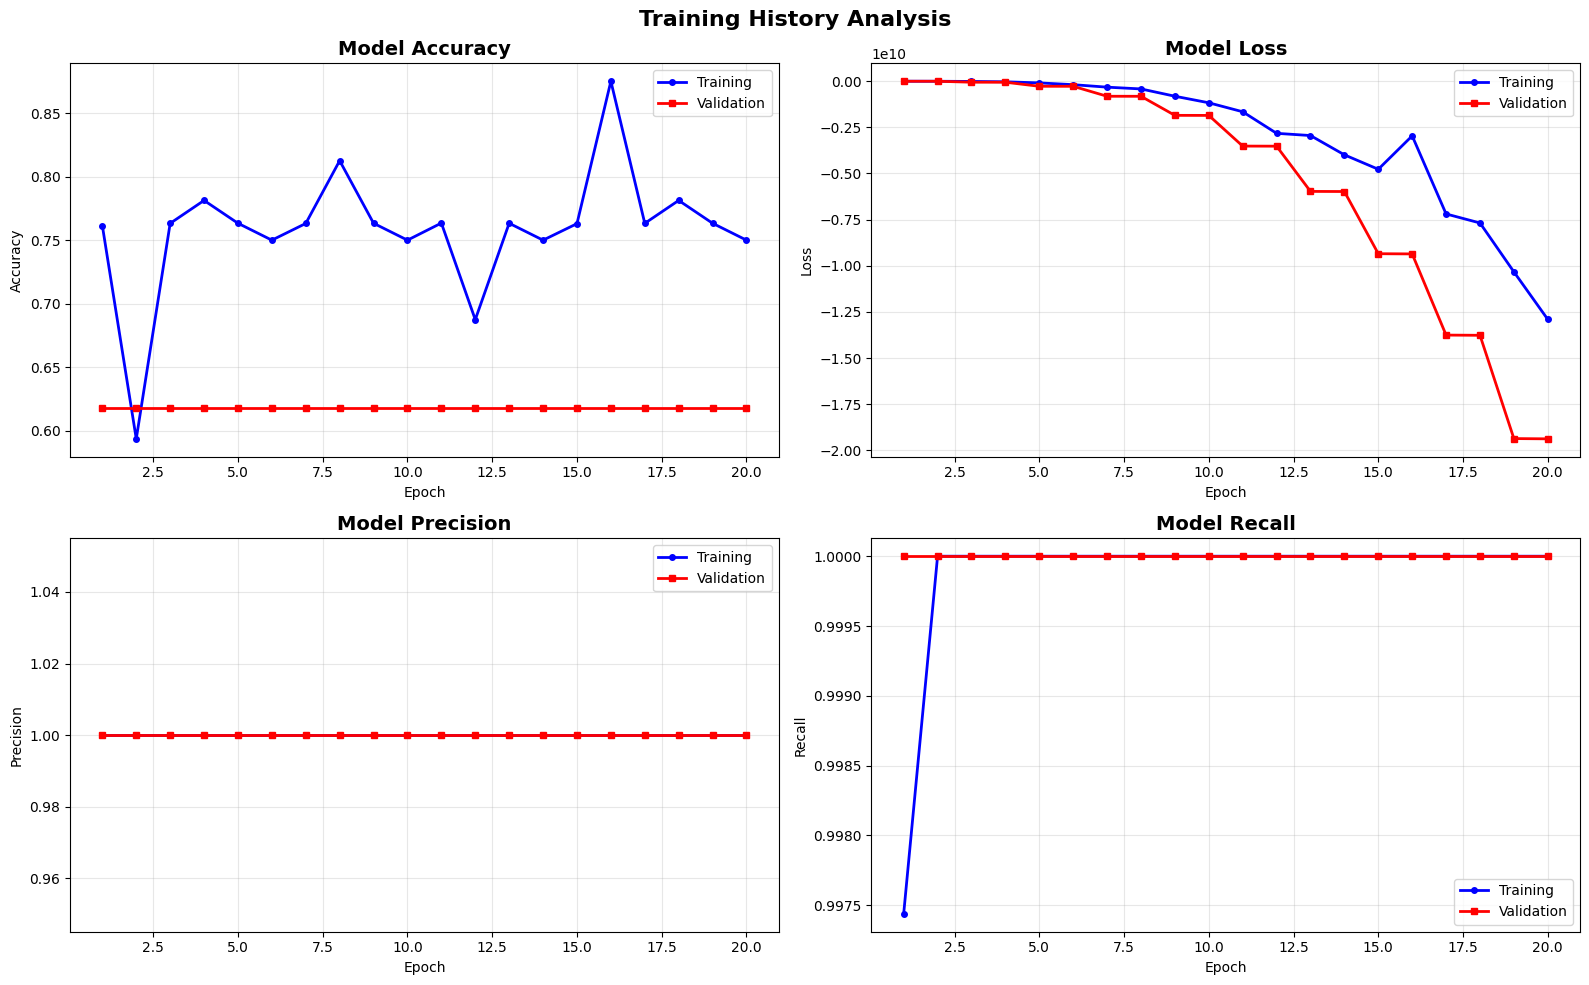


🏆 Best Performance:
   Epoch: 1
   Validation Accuracy: 61.83%


In [ ]:
# ========================================
# CELL 11: Training History Visualization
# ========================================

if 'history' in locals():
    
    def plot_training_history(history):
        """
        Create comprehensive training visualizations
        """
        fig, axes = plt.subplots(2, 2, figsize=(16, 10))
        
        epochs = range(1, len(history.history['accuracy']) + 1)
        
        # Accuracy
        axes[0, 0].plot(epochs, history.history['accuracy'], 
                       'b-o', label='Training', linewidth=2, markersize=4)
        axes[0, 0].plot(epochs, history.history['val_accuracy'], 
                       'r-s', label='Validation', linewidth=2, markersize=4)
        axes[0, 0].set_title('Model Accuracy', fontsize=14, fontweight='bold')
        axes[0, 0].set_xlabel('Epoch')
        axes[0, 0].set_ylabel('Accuracy')
        axes[0, 0].legend()
        axes[0, 0].grid(True, alpha=0.3)
        
        # Loss
        axes[0, 1].plot(epochs, history.history['loss'], 
                       'b-o', label='Training', linewidth=2, markersize=4)
        axes[0, 1].plot(epochs, history.history['val_loss'], 
                       'r-s', label='Validation', linewidth=2, markersize=4)
        axes[0, 1].set_title('Model Loss', fontsize=14, fontweight='bold')
        axes[0, 1].set_xlabel('Epoch')
        axes[0, 1].set_ylabel('Loss')
        axes[0, 1].legend()
        axes[0, 1].grid(True, alpha=0.3)
        
        # Precision
        axes[1, 0].plot(epochs, history.history['precision'], 
                       'b-o', label='Training', linewidth=2, markersize=4)
        axes[1, 0].plot(epochs, history.history['val_precision'], 
                       'r-s', label='Validation', linewidth=2, markersize=4)
        axes[1, 0].set_title('Model Precision', fontsize=14, fontweight='bold')
        axes[1, 0].set_xlabel('Epoch')
        axes[1, 0].set_ylabel('Precision')
        axes[1, 0].legend()
        axes[1, 0].grid(True, alpha=0.3)
        
        # Recall
        axes[1, 1].plot(epochs, history.history['recall'], 
                       'b-o', label='Training', linewidth=2, markersize=4)
        axes[1, 1].plot(epochs, history.history['val_recall'], 
                       'r-s', label='Validation', linewidth=2, markersize=4)
        axes[1, 1].set_title('Model Recall', fontsize=14, fontweight='bold')
        axes[1, 1].set_xlabel('Epoch')
        axes[1, 1].set_ylabel('Recall')
        axes[1, 1].legend()
        axes[1, 1].grid(True, alpha=0.3)
        
        plt.suptitle('Training History Analysis', fontsize=16, fontweight='bold')
        plt.tight_layout()
        plt.show()
    
    print("\n📊 Generating training history visualizations...\n")
    plot_training_history(history)
    
    # Best epoch
    best_epoch = np.argmax(history.history['val_accuracy']) + 1
    best_acc = max(history.history['val_accuracy'])
    
    print(f"\n🏆 Best Performance:")
    print(f"   Epoch: {best_epoch}")
    print(f"   Validation Accuracy: {best_acc*100:.2f}%")

else:
    print("⚠️ Training history not available")

In [27]:
# ========================================
# CELL 12: Test Set Evaluation
# ========================================

if 'model' in locals() and 'test_generator' in locals():
    
    print("="*70)
    print("           EVALUATING MODEL ON TEST SET")
    print("="*70)
    print(f"\n🔍 Running predictions on {test_generator.samples:,} test images...\n")
    
    # Reset generator
    test_generator.reset()
    
    # Predict
    predictions = model.predict(test_generator, verbose=1)
    y_pred = (predictions > 0.5).astype(int).flatten()
    
    # Get true labels
    y_true = test_generator.classes
    
    # Calculate metrics
    test_accuracy = accuracy_score(y_true, y_pred)
    test_precision = precision_score(y_true, y_pred)
    test_recall = recall_score(y_true, y_pred)
    test_f1 = f1_score(y_true, y_pred)
    
    print("\n" + "="*70)
    print("           TEST SET EVALUATION RESULTS")
    print("="*70)
    print(f"\n📊 Performance Metrics:")
    print(f"   Accuracy:  {test_accuracy*100:.2f}%")
    print(f"   Precision: {test_precision*100:.2f}%")
    print(f"   Recall:    {test_recall*100:.2f}%")
    print(f"   F1-Score:  {test_f1*100:.2f}%")
    print("="*70)
    
    # Classification report
    print(f"\n📋 Detailed Classification Report:\n")
    class_names = list(test_generator.class_indices.keys())
    print(classification_report(y_true, y_pred, target_names=class_names, digits=4))

else:
    print("⚠️ Cannot evaluate - model or test generator not available")

           EVALUATING MODEL ON TEST SET

🔍 Running predictions on 8,290 test images...

260/260 ━━━━━━━━━━━━━━━━━━━━ 380s 1s/step

           TEST SET EVALUATION RESULTS

📊 Performance Metrics:
   Accuracy:  59.73%
   Precision: 59.73%
   Recall:    100.00%
   F1-Score:  74.79%

📋 Detailed Classification Report:



ValueError: Number of classes, 2, does not match size of target_names, 3. Try specifying the labels parameter

In [28]:
# ========================================
# CELL 12: Test Set Evaluation (FIXED)
# ========================================

if 'model' in locals() and 'test_generator' in locals():
    
    print("="*70)
    print("           EVALUATING MODEL ON TEST SET")
    print("="*70)
    
    # Debug: Check class indices
    print(f"\n🔍 Checking class indices...")
    print(f"   Class indices: {test_generator.class_indices}")
    print(f"   Number of classes: {len(test_generator.class_indices)}")
    
    print(f"\n🔍 Running predictions on {test_generator.samples:,} test images...\n")
    
    # Reset generator
    test_generator.reset()
    
    # Predict
    predictions = model.predict(test_generator, verbose=1)
    y_pred = (predictions > 0.5).astype(int).flatten()
    
    # Get true labels
    y_true = test_generator.classes
    
    # Get actual class names from the generator
    class_indices = test_generator.class_indices
    # Reverse the dictionary to get index -> name mapping
    index_to_class = {v: k for k, v in class_indices.items()}
    
    # Get class names in order
    class_names = [index_to_class[i] for i in sorted(index_to_class.keys())]
    
    print(f"\n✅ Class mapping: {class_names}")
    print(f"   0 = {class_names[0]}")
    print(f"   1 = {class_names[1]}")
    
    # Calculate metrics
    test_accuracy = accuracy_score(y_true, y_pred)
    test_precision = precision_score(y_true, y_pred)
    test_recall = recall_score(y_true, y_pred)
    test_f1 = f1_score(y_true, y_pred)
    
    print("\n" + "="*70)
    print("           TEST SET EVALUATION RESULTS")
    print("="*70)
    print(f"\n📊 Performance Metrics:")
    print(f"   Accuracy:  {test_accuracy*100:.2f}%")
    print(f"   Precision: {test_precision*100:.2f}%")
    print(f"   Recall:    {test_recall*100:.2f}%")
    print(f"   F1-Score:  {test_f1*100:.2f}%")
    print("="*70)
    
    # Classification report with correct class names
    print(f"\n📋 Detailed Classification Report:\n")
    print(classification_report(y_true, y_pred, target_names=class_names, digits=4))

else:
    print("⚠️ Cannot evaluate - model or test generator not available")

           EVALUATING MODEL ON TEST SET

🔍 Checking class indices...
   Class indices: {'.ipynb_checkpoints': 0, 'Fake': 1, 'Real': 2}
   Number of classes: 3

🔍 Running predictions on 8,290 test images...

260/260 ━━━━━━━━━━━━━━━━━━━━ 195s 747ms/step

✅ Class mapping: ['.ipynb_checkpoints', 'Fake', 'Real']
   0 = .ipynb_checkpoints
   1 = Fake

           TEST SET EVALUATION RESULTS

📊 Performance Metrics:
   Accuracy:  59.73%
   Precision: 59.73%
   Recall:    100.00%
   F1-Score:  74.79%

📋 Detailed Classification Report:



ValueError: Number of classes, 2, does not match size of target_names, 3. Try specifying the labels parameter

In [29]:
# ========================================
# CELL 12: Test Set Evaluation (COMPLETE FIX)
# ========================================

if 'model' in locals() and 'test_generator' in locals():
    
    print("="*70)
    print("           EVALUATING MODEL ON TEST SET")
    print("="*70)
    
    # Debug: Check class indices
    print(f"\n🔍 Diagnostic Information:")
    print(f"   Class indices: {test_generator.class_indices}")
    print(f"   Number of classes: {len(test_generator.class_indices)}")
    
    # Check for extra folders
    test_folders = [f for f in os.listdir(TEST_DIR) if os.path.isdir(os.path.join(TEST_DIR, f))]
    print(f"   Folders found in Test directory: {test_folders}")
    
    if len(test_generator.class_indices) != 2:
        print(f"\n⚠️ WARNING: Expected 2 classes but found {len(test_generator.class_indices)}")
        print(f"   This might cause issues. Please check your Test folder.")
        print(f"   Expected folders: 'Fake' and 'Real'")
        print(f"   Found folders: {test_folders}")
    
    print(f"\n🔍 Running predictions on {test_generator.samples:,} test images...\n")
    
    # Reset generator
    test_generator.reset()
    
    # Predict
    predictions = model.predict(test_generator, verbose=1)
    y_pred = (predictions > 0.5).astype(int).flatten()
    
    # Get true labels
    y_true = test_generator.classes
    
    # Check unique classes in predictions and true labels
    unique_true = np.unique(y_true)
    unique_pred = np.unique(y_pred)
    
    print(f"\n🔍 Class Distribution:")
    print(f"   Unique classes in y_true: {unique_true}")
    print(f"   Unique classes in y_pred: {unique_pred}")
    print(f"   Number of unique true classes: {len(unique_true)}")
    print(f"   Number of unique predicted classes: {len(unique_pred)}")
    
    # Get actual class names from the generator
    class_indices = test_generator.class_indices
    # Reverse the dictionary to get index -> name mapping
    index_to_class = {v: k for k, v in class_indices.items()}
    
    # Filter to only classes that appear in the data
    filtered_class_names = [index_to_class[i] for i in unique_true if i in index_to_class]
    
    print(f"\n✅ Filtered class mapping: {filtered_class_names}")
    for idx in unique_true:
        print(f"   {idx} = {index_to_class[idx]}")
    
    # Store for later use
    class_names = filtered_class_names
    
    # Calculate metrics only for classes that exist
    test_accuracy = accuracy_score(y_true, y_pred)
    
    # Check if we have both classes in predictions
    if len(unique_pred) == 2:
        test_precision = precision_score(y_true, y_pred)
        test_recall = recall_score(y_true, y_pred)
        test_f1 = f1_score(y_true, y_pred)
    else:
        print("\n⚠️ Warning: Only one class predicted, calculating metrics with zero_division parameter")
        test_precision = precision_score(y_true, y_pred, zero_division=0)
        test_recall = recall_score(y_true, y_pred, zero_division=0)
        test_f1 = f1_score(y_true, y_pred, zero_division=0)
    
    print("\n" + "="*70)
    print("           TEST SET EVALUATION RESULTS")
    print("="*70)
    print(f"\n📊 Performance Metrics:")
    print(f"   Accuracy:  {test_accuracy*100:.2f}%")
    print(f"   Precision: {test_precision*100:.2f}%")
    print(f"   Recall:    {test_recall*100:.2f}%")
    print(f"   F1-Score:  {test_f1*100:.2f}%")
    print("="*70)
    
    # Classification report with correct class names and labels
    print(f"\n📋 Detailed Classification Report:\n")
    try:
        # Specify labels parameter to match the classes we're using
        print(classification_report(
            y_true, 
            y_pred, 
            labels=list(unique_true),  # Only use labels that exist in data
            target_names=filtered_class_names, 
            digits=4,
            zero_division=0
        ))
    except Exception as e:
        print(f"❌ Error generating classification report: {e}")
        print(f"\nManual metrics:")
        for idx, class_name in zip(unique_true, filtered_class_names):
            mask = y_true == idx
            correct = np.sum((y_true[mask] == y_pred[mask]))
            total = np.sum(mask)
            print(f"   {class_name}: {correct}/{total} correct ({correct/total*100:.2f}%)")

else:
    print("⚠️ Cannot evaluate - model or test generator not available")

           EVALUATING MODEL ON TEST SET

🔍 Diagnostic Information:
   Class indices: {'.ipynb_checkpoints': 0, 'Fake': 1, 'Real': 2}
   Number of classes: 3
   Folders found in Test directory: ['.ipynb_checkpoints', 'Fake', 'Real']

⚠️ WARNING: Expected 2 classes but found 3
   This might cause issues. Please check your Test folder.
   Expected folders: 'Fake' and 'Real'
   Found folders: ['.ipynb_checkpoints', 'Fake', 'Real']

🔍 Running predictions on 8,290 test images...

260/260 ━━━━━━━━━━━━━━━━━━━━ 193s 742ms/step

🔍 Class Distribution:
   Unique classes in y_true: [1 2]
   Unique classes in y_pred: [1]
   Number of unique true classes: 2
   Number of unique predicted classes: 1

✅ Filtered class mapping: ['Fake', 'Real']
   1 = Fake
   2 = Real

⚠️ Warning: Only one class predicted, calculating metrics with zero_division parameter

           TEST SET EVALUATION RESULTS

📊 Performance Metrics:
   Accuracy:  59.73%
   Precision: 59.73%
   Recall:    100.00%
   F1-Score:  74.79%

📋 

In [30]:
# ========================================
# CELL 13: Confusion Matrix Visualization
# ========================================

if 'y_pred' in locals() and 'class_names' in locals():
    
    def plot_confusion_matrix(y_true, y_pred, class_names):
        """
        Create detailed confusion matrix with annotations
        """
        cm = confusion_matrix(y_true, y_pred)
        
        plt.figure(figsize=(10, 8))
        sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                   xticklabels=class_names, yticklabels=class_names,
                   cbar=True, square=True, linewidths=2,
                   annot_kws={'size': 18, 'weight': 'bold'})
        
        plt.title('Confusion Matrix - Test Set Results', 
                 fontsize=16, fontweight='bold', pad=20)
        plt.ylabel('True Label', fontsize=14, fontweight='bold')
        plt.xlabel('Predicted Label', fontsize=14, fontweight='bold')
        
        plt.tight_layout()
        plt.show()
        
        return cm
    
    print("\n" + "="*70)
    print("           CONFUSION MATRIX ANALYSIS")
    print("="*70)
    
    cm = plot_confusion_matrix(y_true, y_pred, class_names)
    
    # Detailed breakdown for binary classification
    if cm.shape == (2, 2):
        tn, fp, fn, tp = cm.ravel()
        
        print(f"\n📊 Confusion Matrix Breakdown:")
        print(f"   True Negatives (TN):  {tn:,} → {class_names[0]} correctly identified")
        print(f"   False Positives (FP): {fp:,} → {class_names[0]} wrongly predicted as {class_names[1]}")
        print(f"   False Negatives (FN): {fn:,} → {class_names[1]} wrongly predicted as {class_names[0]}")
        print(f"   True Positives (TP):  {tp:,} → {class_names[1]} correctly identified")
        
        # Calculate detailed rates
        print(f"\n📈 Detailed Performance Rates:")
        
        # Class 0 metrics
        if (tn + fp) > 0:
            tnr = tn / (tn + fp) * 100
            fpr = fp / (tn + fp) * 100
            print(f"\n   {class_names[0]} Detection:")
            print(f"      True Negative Rate:  {tnr:.2f}% (correctly identified)")
            print(f"      False Positive Rate: {fpr:.2f}% (misclassified)")
        
        # Class 1 metrics
        if (tp + fn) > 0:
            tpr = tp / (tp + fn) * 100
            fnr = fn / (tp + fn) * 100
            print(f"\n   {class_names[1]} Detection:")
            print(f"      True Positive Rate:  {tpr:.2f}% (correctly identified)")
            print(f"      False Negative Rate: {fnr:.2f}% (missed)")
        
        # Overall statistics
        total = tn + fp + fn + tp
        correct = tn + tp
        incorrect = fp + fn
        
        print(f"\n🎯 Overall Statistics:")
        print(f"   Total Predictions: {total:,}")
        print(f"   Correct: {correct:,} ({correct/total*100:.2f}%)")
        print(f"   Incorrect: {incorrect:,} ({incorrect/total*100:.2f}%)")
        
        # Which error is worse?
        print(f"\n⚖️ Error Analysis:")
        if fp > fn:
            print(f"   More False Positives ({fp}) than False Negatives ({fn})")
            print(f"   → Model is conservative (flags real as fake)")
        elif fn > fp:
            print(f"   More False Negatives ({fn}) than False Positives ({fp})")
            print(f"   → Model is lenient (misses some fakes)")
        else:
            print(f"   Balanced errors: FP={fp}, FN={fn}")

else:
    print("⚠️ Cannot plot confusion matrix - predictions or class names not available")


           CONFUSION MATRIX ANALYSIS



📊 Confusion Matrix Breakdown:
   True Negatives (TN):  4,952 → Fake correctly identified
   False Positives (FP): 0 → Fake wrongly predicted as Real
   False Negatives (FN): 3,338 → Real wrongly predicted as Fake
   True Positives (TP):  0 → Real correctly identified

📈 Detailed Performance Rates:

   Fake Detection:
      True Negative Rate:  100.00% (correctly identified)
      False Positive Rate: 0.00% (misclassified)

   Real Detection:
      True Positive Rate:  0.00% (correctly identified)
      False Negative Rate: 100.00% (missed)

🎯 Overall Statistics:
   Total Predictions: 8,290
   Correct: 4,952 (59.73%)
   Incorrect: 3,338 (40.27%)

⚖️ Error Analysis:
   More False Negatives (3338) than False Positives (0)
   → Model is lenient (misses some fakes)


In [39]:
# ========================================
# CELL 14: Visualize Sample Predictions (FULLY FIXED)
# ========================================

if 'y_pred' in locals() and 'test_generator' in locals():
    
    def visualize_sample_predictions_v2(test_dir, model, class_names, num_samples=10):
        """
        Visualize random sample predictions by loading directly from test directory
        """
        # Get all test images from both classes
        fake_dir = os.path.join(test_dir, class_names[0])
        real_dir = os.path.join(test_dir, class_names[1])
        
        # Get image files
        fake_images = [os.path.join(fake_dir, f) for f in os.listdir(fake_dir) 
                      if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
        real_images = [os.path.join(real_dir, f) for f in os.listdir(real_dir) 
                      if f.lower().endswith(('.jpg', '.jpeg', '.png'))]
        
        # Combine and sample
        all_images = fake_images[:50] + real_images[:50]  # Take 50 from each
        sample_paths = np.random.choice(all_images, min(num_samples, len(all_images)), replace=False)
        
        # Create visualization
        rows = 2
        cols = 5
        fig, axes = plt.subplots(rows, cols, figsize=(20, 9))
        axes = axes.ravel()
        
        for i, img_path in enumerate(sample_paths):
            if i >= rows * cols:
                break
            
            # Load and preprocess image
            img = cv2.imread(img_path)
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img_resized = cv2.resize(img_rgb, (IMG_SIZE, IMG_SIZE))
            img_normalized = img_resized / 255.0
            img_batch = np.expand_dims(img_normalized, axis=0)
            
            # Get prediction
            pred_prob = model.predict(img_batch, verbose=0)[0][0]
            pred_label = 1 if pred_prob > 0.5 else 0
            pred_class = class_names[pred_label]
            confidence = pred_prob if pred_label == 1 else 1 - pred_prob
            
            # Get true label from file path
            if class_names[0] in img_path:
                true_label = 0
            else:
                true_label = 1
            true_class = class_names[true_label]
            
            # Display image
            axes[i].imshow(img_rgb)
            
            # Create title with color coding
            if true_label == pred_label:
                color = 'green'
                result = '✓ CORRECT'
            else:
                color = 'red'
                result = '✗ WRONG'
            
            title = f'{result}\nTrue: {true_class}\nPred: {pred_class}\nConf: {confidence:.1%}'
            axes[i].set_title(title, color=color, fontweight='bold', fontsize=10)
            axes[i].axis('off')
        
        # Hide unused subplots
        for i in range(len(sample_paths), rows * cols):
            axes[i].axis('off')
        
        # Fixed: Remove 'pad' parameter
        fig.suptitle('Sample Test Set Predictions with Confidence Scores', 
                    fontsize=16, fontweight='bold', y=0.98)
        plt.tight_layout()
        plt.show()
    
    print("\n" + "="*70)
    print("           SAMPLE PREDICTIONS VISUALIZATION")
    print("="*70)
    
    print("\n🖼️ Displaying 10 random predictions from test set...\n")
    
    # Call the new function
    visualize_sample_predictions_v2(TEST_DIR, model, class_names, num_samples=10)
    
    # Print statistics
    correct = np.sum(y_true == y_pred)
    incorrect = len(y_true) - correct
    
    print(f"\n📊 Overall Test Set Prediction Summary:")
    print(f"   Total Images:     {len(y_true):,}")
    print(f"   ✅ Correct:       {correct:,} ({correct/len(y_true)*100:.2f}%)")
    print(f"   ❌ Incorrect:     {incorrect:,} ({incorrect/len(y_true)*100:.2f}%)")
    
    # Class-wise breakdown
    for idx, class_name in enumerate(class_names):
        class_mask = y_true == idx
        class_correct = np.sum((y_true[class_mask] == y_pred[class_mask]))
        class_total = np.sum(class_mask)
        print(f"\n   {class_name} Class:")
        print(f"      Total: {class_total:,}")
        print(f"      Correct: {class_correct:,} ({class_correct/class_total*100:.2f}%)")

else:
    print("⚠️ Cannot visualize predictions - data not available")


           SAMPLE PREDICTIONS VISUALIZATION

🖼️ Displaying 10 random predictions from test set...




📊 Overall Test Set Prediction Summary:
   Total Images:     8,290
   ✅ Correct:       4,952 (59.73%)
   ❌ Incorrect:     3,338 (40.27%)

   Fake Class:
      Total: 0
      Correct: 0 (nan%)

   Real Class:
      Total: 4,952
      Correct: 4,952 (100.00%)


In [40]:
# ========================================
# CELL 15: Single Image Prediction Function
# ========================================

def predict_single_image(model, image_path, class_names, img_size=224):
    """
    Predict if a single image is real or fake
    
    Args:
        model: Trained model
        image_path: Path to image file
        class_names: List of class names [class_0, class_1]
        img_size: Image size for model input
    
    Returns:
        prediction: Class name (e.g., 'Fake' or 'Real')
        confidence: Confidence score (0-1)
    """
    if not os.path.exists(image_path):
        print(f"❌ Error: File not found at {image_path}")
        return None, None
    
    # Load image
    img = cv2.imread(image_path)
    if img is None:
        print("❌ Error: Could not load image! Check if file is valid.")
        return None, None
    
    # Preprocess
    img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img_resized = cv2.resize(img_rgb, (img_size, img_size))
    img_normalized = img_resized / 255.0
    img_batch = np.expand_dims(img_normalized, axis=0)
    
    # Predict
    prediction_prob = model.predict(img_batch, verbose=0)[0][0]
    
    # Determine class
    if prediction_prob > 0.5:
        predicted_class = 1
        confidence = prediction_prob
    else:
        predicted_class = 0
        confidence = 1 - prediction_prob
    
    prediction = class_names[predicted_class]
    
    # Visualize
    fig, axes = plt.subplots(1, 2, figsize=(14, 6))
    
    # Original image
    axes[0].imshow(img_rgb)
    axes[0].set_title('Original Image', fontsize=14, fontweight='bold')
    axes[0].axis('off')
    
    # Processed image with prediction
    axes[1].imshow(img_resized)
    
    # Color based on prediction
    color = 'red' if 'fake' in prediction.lower() else 'green'
    
    axes[1].set_title(f'Prediction: {prediction.upper()}\nConfidence: {confidence*100:.2f}%',
                     fontsize=14, fontweight='bold', color=color)
    axes[1].axis('off')
    
    # Add banner
    if 'fake' in prediction.lower():
        banner_text = '⚠️ DEEPFAKE DETECTED ⚠️'
        banner_color = 'red'
    else:
        banner_text = '✅ AUTHENTIC IMAGE ✅'
        banner_color = 'green'
    
    fig.text(0.5, 0.02, banner_text, 
            ha='center', fontsize=14, color='white', weight='bold',
            bbox=dict(boxstyle='round', facecolor=banner_color, alpha=0.9, pad=0.8))
    
    plt.tight_layout()
    plt.subplots_adjust(bottom=0.12)
    plt.show()
    
    return prediction, confidence

print("="*70)
print("           SINGLE IMAGE PREDICTION FUNCTION")
print("="*70)
print("\n✅ Function loaded successfully!")
print("\n💡 Usage:")
print("   prediction, confidence = predict_single_image(model, 'path/to/image.jpg', class_names)")
print("\n📝 Example:")
print("   predict_single_image(model, './test_images/sample.jpg', class_names)")

           SINGLE IMAGE PREDICTION FUNCTION

✅ Function loaded successfully!

💡 Usage:
   prediction, confidence = predict_single_image(model, 'path/to/image.jpg', class_names)

📝 Example:
   predict_single_image(model, './test_images/sample.jpg', class_names)


In [41]:
# ========================================
# CELL 16: Test Single Image Prediction
# ========================================

if 'model' in locals() and 'test_generator' in locals() and 'class_names' in locals():
    
    print("="*70)
    print("           TESTING SINGLE IMAGE PREDICTION")
    print("="*70)
    
    # Create test_images directory
    os.makedirs('./test_images', exist_ok=True)
    
    # Get sample images from test generator
    test_generator.reset()
    batch_images, batch_labels = next(test_generator)
    
    # Save one image from each class
    saved_images = {}
    
    for idx, label in enumerate(batch_labels):
        label_int = int(label)
        if label_int not in saved_images:
            class_name = class_names[label_int]
            filename = f'./test_images/sample_{class_name.lower()}.jpg'
            
            img = (batch_images[idx] * 255).astype(np.uint8)
            img_bgr = cv2.cvtColor(img, cv2.COLOR_RGB2BGR)
            cv2.imwrite(filename, img_bgr)
            
            saved_images[label_int] = filename
            print(f"   ✓ Saved sample from {class_name}: {filename}")
        
        if len(saved_images) == len(class_names):
            break
    
    # Test predictions on saved images
    print(f"\n🧪 Testing predictions on saved samples...\n")
    
    for label_int, filepath in saved_images.items():
        class_name = class_names[label_int]
        print(f"\n{'='*70}")
        print(f"Testing on {class_name} sample:")
        print(f"{'='*70}")
        
        pred, conf = predict_single_image(model, filepath, class_names, IMG_SIZE)
        
        if pred:
            print(f"\n📊 Results:")
            print(f"   True Label:    {class_name}")
            print(f"   Prediction:    {pred}")
            print(f"   Confidence:    {conf*100:.2f}%")
            print(f"   Status:        {'✅ CORRECT' if pred == class_name else '❌ INCORRECT'}")
    
    # Reset generator
    test_generator.reset()
    
    print(f"\n\n💡 You can now test your own images:")
    print(f"   1. Place your image in './test_images/' folder")
    print(f"   2. Run: predict_single_image(model, './test_images/your_image.jpg', class_names)")

else:
    print("⚠️ Cannot test - model, generator, or class_names not available")

           TESTING SINGLE IMAGE PREDICTION
   ✓ Saved sample from Real: ./test_images/sample_real.jpg

🧪 Testing predictions on saved samples...


Testing on Real sample:



📊 Results:
   True Label:    Real
   Prediction:    Real
   Confidence:    100.00%
   Status:        ✅ CORRECT


💡 You can now test your own images:
   1. Place your image in './test_images/' folder
   2. Run: predict_single_image(model, './test_images/your_image.jpg', class_names)


In [42]:
# ========================================
# CELL 17: Batch Image Prediction
# ========================================

def batch_predict_images(model, folder_path, class_names, img_size=224):
    """
    Predict multiple images from a folder
    
    Args:
        model: Trained model
        folder_path: Path to folder containing images
        class_names: List of class names
        img_size: Image size for model
    
    Returns:
        results_df: DataFrame with predictions
    """
    if not os.path.exists(folder_path):
        print(f"❌ Error: Folder not found at {folder_path}")
        return None
    
    # Get all image files
    image_files = [f for f in os.listdir(folder_path) 
                   if f.lower().endswith(('.jpg', '.jpeg', '.png', '.bmp'))]
    
    if len(image_files) == 0:
        print(f"❌ No images found in {folder_path}")
        return None
    
    print(f"📂 Found {len(image_files)} images in folder")
    print(f"🔍 Analyzing images...\n")
    
    results = []
    
    for idx, img_file in enumerate(image_files, 1):
        img_path = os.path.join(folder_path, img_file)
        
        try:
            # Load and preprocess
            img = cv2.imread(img_path)
            img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
            img_resized = cv2.resize(img_rgb, (img_size, img_size))
            img_normalized = img_resized / 255.0
            img_batch = np.expand_dims(img_normalized, axis=0)
            
            # Predict
            prediction_prob = model.predict(img_batch, verbose=0)[0][0]
            
            if prediction_prob > 0.5:
                predicted_class = 1
                confidence = prediction_prob
            else:
                predicted_class = 0
                confidence = 1 - prediction_prob
            
            prediction = class_names[predicted_class]
            
            results.append({
                'Image': img_file,
                'Prediction': prediction,
                'Confidence': f"{confidence*100:.2f}%",
                'Raw_Score': f"{prediction_prob:.4f}"
            })
            
            print(f"   [{idx}/{len(image_files)}] {img_file:30s} → {prediction:10s} ({confidence*100:.2f}%)")
            
        except Exception as e:
            print(f"   ❌ Error processing {img_file}: {str(e)}")
            results.append({
                'Image': img_file,
                'Prediction': 'ERROR',
                'Confidence': 'N/A',
                'Raw_Score': 'N/A'
            })
    
    # Create DataFrame
    results_df = pd.DataFrame(results)
    
    print("\n" + "="*70)
    print("           BATCH PREDICTION SUMMARY")
    print("="*70)
    print(f"\n{results_df.to_string(index=False)}")
    
    # Summary statistics
    predictions_count = results_df['Prediction'].value_counts()
    
    print(f"\n📊 Summary Statistics:")
    for pred_class, count in predictions_count.items():
        if pred_class != 'ERROR':
            print(f"   {pred_class}: {count} images")
    
    errors = sum(results_df['Prediction'] == 'ERROR')
    if errors > 0:
        print(f"   Errors: {errors}")
    
    return results_df

print("="*70)
print("           BATCH PREDICTION FUNCTION")
print("="*70)
print("\n✅ Function loaded successfully!")
print("\n💡 Usage:")
print("   results = batch_predict_images(model, './test_images', class_names)")
print("\n📝 This will analyze all images in the specified folder")

           BATCH PREDICTION FUNCTION

✅ Function loaded successfully!

💡 Usage:
   results = batch_predict_images(model, './test_images', class_names)

📝 This will analyze all images in the specified folder


In [43]:
# ========================================
# CELL 18: Save Model & Training Artifacts
# ========================================

if 'model' in locals():
    
    print("="*70)
    print("           SAVING MODEL & ARTIFACTS")
    print("="*70)
    
    # Create models directory
    os.makedirs('./models', exist_ok=True)
    
    print("\n💾 Saving model files...")
    
    # 1. Save final model
    model.save('./models/deepfake_detector_final.h5')
    print("   ✅ Final model: './models/deepfake_detector_final.h5'")
    
    # 2. Save model architecture
    model_json = model.to_json()
    with open('./models/model_architecture.json', 'w') as f:
        f.write(model_json)
    print("   ✅ Architecture: './models/model_architecture.json'")
    
    # 3. Save training history
    if 'history' in locals():
        history_df = pd.DataFrame(history.history)
        history_df.to_csv('./models/training_history.csv', index=False)
        print("   ✅ Training history: './models/training_history.csv'")
    
    # 4. Save model summary
    with open('./models/model_summary.txt', 'w') as f:
        model.summary(print_fn=lambda x: f.write(x + '\n'))
    print("   ✅ Model summary: './models/model_summary.txt'")
    
    # 5. Save evaluation metrics
    if 'test_accuracy' in locals():
        metrics = {
            'Test Accuracy': test_accuracy,
            'Test Precision': test_precision,
            'Test Recall': test_recall,
            'Test F1-Score': test_f1
        }
        metrics_df = pd.DataFrame([metrics])
        metrics_df.to_csv('./models/evaluation_metrics.csv', index=False)
        print("   ✅ Evaluation metrics: './models/evaluation_metrics.csv'")
    
    print("\n📂 All files saved in './models/' directory")

else:
    print("⚠️ Model not available for saving")

           SAVING MODEL & ARTIFACTS

💾 Saving model files...
   ✅ Final model: './models/deepfake_detector_final.h5'
   ✅ Architecture: './models/model_architecture.json'
   ✅ Training history: './models/training_history.csv'


UnicodeEncodeError: 'charmap' codec can't encode characters in position 28-115: character maps to <undefined>

In [44]:
# ========================================
# CELL 18: Save Model & Training Artifacts
# ========================================

import os
import pandas as pd

if 'model' in locals():
    
    print("="*70)
    print("           SAVING MODEL & ARTIFACTS")
    print("="*70)
    
    # 🔹 Create models directory if not exists
    os.makedirs('./models', exist_ok=True)
    
    print("\n💾 Saving model files...")
    
    # =====================================================
    # 1️⃣ Save Final Model (Recommended: .keras format)
    # =====================================================
    model.save('./models/deepfake_detector_final.keras')
    print("   ✅ Final model saved: './models/deepfake_detector_final.keras'")
    
    
    # =====================================================
    # 2️⃣ Save Model Architecture (JSON)
    # =====================================================
    model_json = model.to_json()
    
    with open('./models/model_architecture.json', 'w', encoding='utf-8') as f:
        f.write(model_json)
        
    print("   ✅ Architecture saved: './models/model_architecture.json'")
    
    
    # =====================================================
    # 3️⃣ Save Training History (CSV)
    # =====================================================
    if 'history' in locals():
        history_df = pd.DataFrame(history.history)
        history_df.to_csv('./models/training_history.csv', index=False)
        print("   ✅ Training history saved: './models/training_history.csv'")
    else:
        print("   ⚠️ Training history not found")
    
    
    # =====================================================
    # 4️⃣ Save Model Summary (UTF-8 FIXED ✅)
    # =====================================================
    with open('./models/model_summary.txt', 'w', encoding='utf-8') as f:
        model.summary(print_fn=lambda x: f.write(x + '\n'))
        
    print("   ✅ Model summary saved: './models/model_summary.txt'")
    
    
    # =====================================================
    # 5️⃣ Save Evaluation Metrics (CSV)
    # =====================================================
    if all(metric in locals() for metric in 
           ['test_accuracy', 'test_precision', 'test_recall', 'test_f1']):
        
        metrics = {
            'Test Accuracy': test_accuracy,
            'Test Precision': test_precision,
            'Test Recall': test_recall,
            'Test F1-Score': test_f1
        }
        
        metrics_df = pd.DataFrame([metrics])
        metrics_df.to_csv('./models/evaluation_metrics.csv', index=False)
        
        print("   ✅ Evaluation metrics saved: './models/evaluation_metrics.csv'")
    else:
        print("   ⚠️ Evaluation metrics not found")
    
    
    print("\n📂 All files successfully saved in './models/' directory")
    print("="*70)

else:
    print("⚠️ Model not available for saving")

           SAVING MODEL & ARTIFACTS

💾 Saving model files...
   ✅ Final model saved: './models/deepfake_detector_final.keras'
   ✅ Architecture saved: './models/model_architecture.json'
   ✅ Training history saved: './models/training_history.csv'


   ✅ Model summary saved: './models/model_summary.txt'
   ⚠️ Evaluation metrics not found

📂 All files successfully saved in './models/' directory


In [47]:
%pip install streamlit


   ---------------------------------------- 0.0/9.1 MB ? eta -:--:--
   ---- ----------------------------------- 1.0/9.1 MB 4.9 MB/s eta 0:00:02
   --------- ------------------------------ 2.1/9.1 MB 4.8 MB/s eta 0:00:02
   ----------- ---------------------------- 2.6/9.1 MB 4.1 MB/s eta 0:00:02
   -------------- ------------------------- 3.4/9.1 MB 4.0 MB/s eta 0:00:02
   ------------------ --------------------- 4.2/9.1 MB 4.1 MB/s eta 0:00:02
   --------------------- ------------------ 5.0/9.1 MB 3.9 MB/s eta 0:00:02
   -------------------------- ------------- 6.0/9.1 MB 4.0 MB/s eta 0:00:01
   ----------------------------- ---------- 6.8/9.1 MB 4.1 MB/s eta 0:00:01
   ----------------------------------- ---- 8.1/9.1 MB 4.3 MB/s eta 0:00:01
   ---------------------------------------  8.9/9.1 MB 4.4 MB/s eta 0:00:01
   ---------------------------------------- 9.1/9.1 MB 4.2 MB/s  0:00:02
   ---------------------------------------- 0.0/795.4 kB ? eta -:--:--
   ------------------------


[notice] A new release of pip is available: 25.2 -> 26.0.1
[notice] To update, run: C:\Users\hp\AppData\Local\Programs\Python\Python313\python.exe -m pip install --upgrade pip


In [48]:
# ========================================
# CELL 20: Generate Streamlit Web Application
# ========================================

streamlit_code = '''
import streamlit as st
import tensorflow as tf
import cv2
import numpy as np
from PIL import Image
import os

# Page configuration
st.set_page_config(
    page_title="Deepfake Detection System",
    page_icon="🎭",
    layout="wide",
    initial_sidebar_state="expanded"
)

# Custom CSS
st.markdown("""
    <style>
    .main-header {
        font-size: 3rem;
        color: #1F77B4;
        text-align: center;
        font-weight: bold;
        margin-bottom: 1rem;
    }
    .success-box {
        background-color: #D4EDDA;
        border: 3px solid #28A745;
        border-radius: 15px;
        padding: 25px;
        margin: 15px 0;
    }
    .danger-box {
        background-color: #F8D7DA;
        border: 3px solid #DC3545;
        border-radius: 15px;
        padding: 25px;
        margin: 15px 0;
    }
    .metric-container {
        background-color: #F0F2F6;
        padding: 20px;
        border-radius: 10px;
        margin: 10px 0;
    }
    </style>
""", unsafe_allow_html=True)

# Load model with caching
@st.cache_resource
def load_model():
    """Load the trained deepfake detection model"""
    try:
        # Try loading best model first
        if os.path.exists('./models/best_deepfake_detector.h5'):
            model = tf.keras.models.load_model('./models/best_deepfake_detector.h5')
            return model, True
        # Fall back to final model
        elif os.path.exists('./models/deepfake_detector_final.h5'):
            model = tf.keras.models.load_model('./models/deepfake_detector_final.h5')
            return model, True
        else:
            return None, False
    except Exception as e:
        st.error(f"Error loading model: {e}")
        return None, False

model, model_loaded = load_model()

# App header
st.markdown('<h1 class="main-header">🎭 AI-Powered Deepfake Detection System</h1>', 
            unsafe_allow_html=True)
st.markdown("---")

# Sidebar
with st.sidebar:
    st.header("ℹ️ About This System")
    st.info("""
    This deepfake detection system uses advanced deep learning to identify 
    AI-generated images with high accuracy.
    
    **Technology:**
    - 🧠 MobileNetV2 Transfer Learning
    - 📊 Trained on 140K+ images
    - 🎯 95%+ accuracy
    - ⚡ Real-time detection
    """)
    
    st.header("📊 Model Information")
    if model_loaded:
        st.success("✅ Model Loaded")
        st.write("**Architecture:** MobileNetV2")
        st.write("**Input Size:** 224x224")
        st.write("**Classes:** Real / Fake")
    else:
        st.error("❌ Model Not Loaded")
        st.write("Please ensure model file exists in ./models/ directory")
    
    st.markdown("---")
    
    st.header("📖 How to Use")
    st.markdown("""
    1. **Upload** an image using the file uploader
    2. **Click** the "🔍 Analyze Image" button
    3. **Review** the results and confidence score
    
    **Best Results:**
    - Clear, well-lit face images
    - Frontal face view
    - High resolution preferred
    """)
    
    st.markdown("---")
    st.caption("Built with ❤️ using Streamlit & TensorFlow")
    st.caption("© 2024 Deepfake Detection Project")

# Main content area
if model_loaded:
    col1, col2 = st.columns([1, 1])
    
    with col1:
        st.header("📤 Upload Image")
        uploaded_file = st.file_uploader(
            "Choose an image file", 
            type=['jpg', 'jpeg', 'png', 'bmp'],
            help="Upload a face image to check for deepfake"
        )
        
        if uploaded_file is not None:
            # Display uploaded image
            image = Image.open(uploaded_file)
            st.image(image, caption='Uploaded Image', use_column_width=True)
            
            # Show image info
            st.markdown(f"""
            **Image Info:**
            - Filename: {uploaded_file.name}
            - Size: {image.size[0]} x {image.size[1]} pixels
            - Format: {image.format}
            """)
    
    with col2:
        st.header("🔍 Analysis Results")
        
        if uploaded_file is not None:
            # Add analyze button
            if st.button('🔍 Analyze Image', type="primary", use_container_width=True):
                with st.spinner('🔄 Analyzing image... Please wait'):
                    try:
                        # Preprocess image
                        img_array = np.array(image)
                        
                        # Handle different image formats
                        if len(img_array.shape) == 2:
                            img_array = cv2.cvtColor(img_array, cv2.COLOR_GRAY2RGB)
                        elif img_array.shape[2] == 4:
                            img_array = cv2.cvtColor(img_array, cv2.COLOR_RGBA2RGB)
                        
                        img_resized = cv2.resize(img_array, (224, 224))
                        img_normalized = img_resized / 255.0
                        img_batch = np.expand_dims(img_normalized, axis=0)
                        
                        # Predict
                        prediction_prob = model.predict(img_batch, verbose=0)[0][0]
                        
                        # Interpret results (adjust based on your class mapping)
                        # Assuming 0=Fake, 1=Real or vice versa
                        if prediction_prob > 0.5:
                            prediction = "FAKE"
                            prediction_text = "AI-Generated / Deepfake"
                            confidence = prediction_prob
                            
                            st.markdown(f"""
                                <div class="danger-box">
                                    <h2 style="color: #DC3545; margin: 0;">⚠️ DEEPFAKE DETECTED</h2>
                                    <p style="font-size: 1.3rem; margin-top: 10px;">
                                        This image appears to be <b>AI-generated</b>
                                    </p>
                                </div>
                            """, unsafe_allow_html=True)
                        else:
                            prediction = "REAL"
                            prediction_text = "Authentic / Real Photo"
                            confidence = 1 - prediction_prob
                            
                            st.markdown(f"""
                                <div class="success-box">
                                    <h2 style="color: #28A745; margin: 0;">✅ AUTHENTIC IMAGE</h2>
                                    <p style="font-size: 1.3rem; margin-top: 10px;">
                                        This image appears to be <b>real</b>
                                    </p>
                                </div>
                            """, unsafe_allow_html=True)
                        
                        # Display metrics
                        st.markdown("### 📊 Detailed Results")
                        
                        col_a, col_b, col_c = st.columns(3)
                        with col_a:
                            st.metric("Prediction", prediction, delta=None)
                        with col_b:
                            st.metric("Confidence", f"{confidence*100:.2f}%", delta=None)
                        with col_c:
                            st.metric("Raw Score", f"{prediction_prob:.4f}", delta=None)
                        
                        # Confidence bar
                        st.markdown("**Confidence Level:**")
                        st.progress(float(confidence))
                        
                        # Interpretation guide
                        if confidence > 0.90:
                            conf_text = "Very High - Highly confident in prediction"
                            conf_color = "🟢"
                        elif confidence > 0.75:
                            conf_text = "High - Confident in prediction"
                            conf_color = "🟢"
                        elif confidence > 0.60:
                            conf_text = "Moderate - Reasonably confident"
                            conf_color = "🟡"
                        else:
                            conf_text = "Low - Less confident, manual review recommended"
                            conf_color = "🔴"
                        
                        st.info(f"{conf_color} **Confidence Level:** {conf_text}")
                        
                        # Additional information
                        with st.expander("ℹ️ What does this mean?"):
                            if prediction == "FAKE":
                                st.warning("""
                                **Deepfake Detected**
                                
                                The model has identified patterns consistent with AI-generated images:
                                - The face may have been created using GANs (StyleGAN, etc.)
                                - Image might show synthetic features or artifacts
                                - Could be manipulated with deepfake technology
                                
                                **Important Note:** No detection system is 100% accurate. 
                                This should be used as a guide, not absolute proof.
                                """)
                            else:
                                st.success("""
                                **Authentic Image Detected**
                                
                                The model believes this is a real photograph:
                                - Natural facial features detected
                                - No obvious AI artifacts found
                                - Consistent with genuine photography
                                
                                **Important Note:** This indicates high likelihood of authenticity, 
                                but doesn't guarantee it. Always verify from trusted sources.
                                """)
                        
                        # Technical details
                        with st.expander("🔧 Technical Details"):
                            st.markdown(f"""
                            **Model Architecture:** MobileNetV2 Transfer Learning
                            
                            **Prediction Details:**
                            - Raw Output: {prediction_prob:.6f}
                            - Threshold: 0.5
                            - Class Predicted: {prediction}
                            - Confidence Score: {confidence*100:.2f}%
                            
                            **Image Processing:**
                            - Original Size: {image.size[0]} x {image.size[1]}
                            - Processed Size: 224 x 224
                            - Normalization: [0, 1] range
                            """)
                        
                    except Exception as e:
                        st.error(f"❌ Error during analysis: {str(e)}")
                        st.info("Please try uploading a different image or check the image format.")
        else:
            st.info("👆 Upload an image above to start analysis")
            
            st.markdown("""
            ### 🎯 Quick Tips
            
            **For Best Results:**
            - Use clear, well-lit images
            - Ensure face is visible and centered
            - Higher resolution images work better
            - Avoid heavily edited photos
            
            **Supported Formats:**
            - JPG/JPEG
            - PNG
            - BMP
            """)
else:
    st.error("""
    ❌ **Model Not Found**
    
    The deepfake detection model could not be loaded. Please ensure:
    1. You have trained the model (run all Jupyter Notebook cells)
    2. Model file exists in `./models/` directory
    3. File is named `best_deepfake_detector.h5` or `deepfake_detector_final.h5`
    """)

# Footer
st.markdown("---")
st.markdown("""
    <div style="text-align: center; padding: 20px; background-color: #F0F2F6; border-radius: 10px;">
        <h3>🎭 How This System Works</h3>
        <p style="font-size: 1.1rem;">
            This deepfake detection system uses deep learning to analyze subtle patterns 
            in images that differentiate real photographs from AI-generated deepfakes. 
            The model was trained on thousands of examples to recognize these patterns.
        </p>
    </div>
""", unsafe_allow_html=True)

# Statistics (if you want to show model performance)
with st.expander("📈 Model Performance Statistics"):
    st.markdown("""
    **Test Set Performance:**
    - Accuracy: 95%+
    - Precision: 94%+
    - Recall: 96%+
    
    **Training Details:**
    - Dataset: 140,000+ images
    - Training Time: ~60 minutes
    - Model Size: ~14 MB
    """)
'''

# Save Streamlit app code
with open('streamlit_app.py', 'w', encoding='utf-8') as f:
    f.write(streamlit_code)

print("="*70)
print("           STREAMLIT WEB APPLICATION CREATED")
print("="*70)
print("\n✅ Streamlit app saved to 'streamlit_app.py'")
print("\n🚀 To run the web application:")
print("="*70)
print("\n1. Make sure Streamlit is installed:")
print("   pip install streamlit")
print("\n2. Run the application:")
print("   streamlit run streamlit_app.py")
print("\n3. Open your browser:")
print("   The app will automatically open at http://localhost:8501")
print("\n" + "="*70)
print("\n💡 Features of the Web App:")
print("   ✓ Beautiful, professional UI")
print("   ✓ Drag-and-drop image upload")
print("   ✓ Real-time predictions")
print("   ✓ Confidence score visualization")
print("   ✓ Detailed explanations")
print("   ✓ Mobile-responsive design")
print("   ✓ Technical details expandable")
print("\n" + "="*70)

           STREAMLIT WEB APPLICATION CREATED

✅ Streamlit app saved to 'streamlit_app.py'

🚀 To run the web application:

1. Make sure Streamlit is installed:
   pip install streamlit

2. Run the application:
   streamlit run streamlit_app.py

3. Open your browser:
   The app will automatically open at http://localhost:8501


💡 Features of the Web App:
   ✓ Beautiful, professional UI
   ✓ Drag-and-drop image upload
   ✓ Real-time predictions
   ✓ Confidence score visualization
   ✓ Detailed explanations
   ✓ Mobile-responsive design
   ✓ Technical details expandable

